<a href="https://colab.research.google.com/github/nehaa28/JulyTask/blob/main/Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Why do we need initialization?

The first step that comes in consideration while building a neural network is the initialization of parameters, if done correctly then optimization will be achieved in the least time otherwise converging to a minima using gradient descent will be impossible.




In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mnist1 = tf.keras.datasets.mnist

(X_train_full, y_train_full), (X_test, y_test) = mnist1.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train =  y_train_full[:5000], y_train_full[5000:]


# Observe and document use of Early Stopping and Check-pointing.

These are all types of callback implemented during model fitting.

Early Stopping - a form of regularization used to avoid overfitting when training a learner with an iterative method, such as gradient descent. This function of Keras callbacks is used to stop the model training in between

Model Checkpoint - This function of keras callbacks is used to save the model after every epoch. We just need to define a few of the parameters like where we want to store, what we want to monitor and etc. 

In [4]:
# Early Stopping
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [5]:
# Model Checkpoint saving
CKPT_path = "model_ckpt_01.h5"
checkpointing_cb = tf.keras.callbacks.ModelCheckpoint(CKPT_path, save_best_only=True)

In [7]:
model_1 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape = [28,28], name = 'input_layer'),
                                     tf.keras.layers.Dense(300,activation='relu',name= 'hidden_layer_1'),
                                     tf.keras.layers.Dense(200, activation = 'relu', name = 'hidden_layer_2'),
                                     tf.keras.layers.Dense(100, activation = 'relu', name = 'hidden_layer_3'),
                                     tf.keras.layers.Dense(10, activation='softmax', name = 'output_layer')])

LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_1.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZER, metrics=METRICS)

EPOCHS = 50
VALIDATION_SET = (X_valid, y_valid)

history = model_1.fit(X_train, y_train, epochs=EPOCHS, validation_data=VALIDATION_SET,batch_size = 32, callbacks= [early_stopping_cb, checkpointing_cb])

Epoch 1/50
1719/1719 [==============================] - 8s 4ms/step - loss: 0.6062 - accuracy: 0.8411 - val_loss: 0.2952 - val_accuracy: 0.9168
Epoch 2/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2604 - accuracy: 0.9259 - val_loss: 0.2112 - val_accuracy: 0.9396
Epoch 3/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2026 - accuracy: 0.9414 - val_loss: 0.1787 - val_accuracy: 0.9478
Epoch 4/50
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1662 - accuracy: 0.9523 - val_loss: 0.1462 - val_accuracy: 0.9606
Epoch 5/50
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1398 - accuracy: 0.9597 - val_loss: 0.1317 - val_accuracy: 0.9628
Epoch 6/50
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1204 - accuracy: 0.9660 - val_loss: 0.1175 - val_accuracy: 0.9668
Epoch 7/50
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1055 - accuracy: 0.9698 - val_loss: 0.1066 - val_accuracy:

# Compare and document different available weight initialization techniques.

The aim of weight initialization is to prevent layer activation outputs from exploding or vanishing during the course of a forward pass through a deep neural network. 

1. Glorot Initialization(or Xavier initialization):


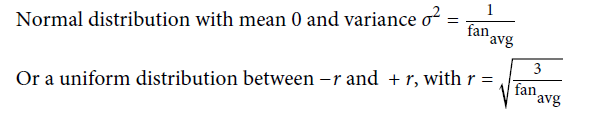




In [8]:
model_2 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape = [28,28], name = 'input_layer'),
                                     tf.keras.layers.Dense(300,activation='relu', kernel_initializer= 'glorot_normal'),
                                     tf.keras.layers.Dense(200, activation = 'relu', kernel_initializer= 'glorot_normal'),
                                     tf.keras.layers.Dense(100, activation = 'relu', kernel_initializer= 'glorot_normal'),
                                     tf.keras.layers.Dense(10, activation='softmax')])

In [9]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Flatten)        (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 316,810
Trainable params: 316,810
Non-trainable params: 0
_________________________________________________________________


In [10]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_2.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZER, metrics=METRICS)

In [11]:
EPOCHS = 10
VALIDATION_SET = (X_valid, y_valid)
history = model_2.fit(X_train, y_train, epochs=EPOCHS, validation_data=VALIDATION_SET,batch_size = 32)

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6137 - accuracy: 0.8389 - val_loss: 0.2747 - val_accuracy: 0.9228
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2540 - accuracy: 0.9277 - val_loss: 0.2033 - val_accuracy: 0.9458
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1973 - accuracy: 0.9430 - val_loss: 0.1684 - val_accuracy: 0.9498
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1620 - accuracy: 0.9530 - val_loss: 0.1514 - val_accuracy: 0.9558
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1368 - accuracy: 0.9607 - val_loss: 0.1272 - val_accuracy: 0.9650
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1180 - accuracy: 0.9661 - val_loss: 0.1152 - val_accuracy: 0.9686
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1026 - accuracy: 0.9708 - val_loss: 0.1056 - val_accuracy:

In [12]:
#Using Glorot uniform
model_3 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape = [28,28], name = 'input_layer'),
                                     tf.keras.layers.Dense(300,activation='relu', kernel_initializer= 'glorot_uniform'),
                                     tf.keras.layers.Dense(200, activation = 'relu', kernel_initializer= 'glorot_uniform'),
                                     tf.keras.layers.Dense(100, activation = 'relu', kernel_initializer= 'glorot_uniform'),
                                     tf.keras.layers.Dense(10, activation='softmax')])

model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Flatten)        (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_5 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 316,810
Trainable params: 316,810
Non-trainable params: 0
_________________________________________________________________


In [13]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_3.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZER, metrics=METRICS)

EPOCHS = 10
VALIDATION_SET = (X_valid, y_valid)

history = model_3.fit(X_train, y_train, epochs=EPOCHS, validation_data=VALIDATION_SET,batch_size = 32)

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6233 - accuracy: 0.8254 - val_loss: 0.2846 - val_accuracy: 0.9192
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2612 - accuracy: 0.9237 - val_loss: 0.2206 - val_accuracy: 0.9368
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2034 - accuracy: 0.9416 - val_loss: 0.1690 - val_accuracy: 0.9512
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1677 - accuracy: 0.9515 - val_loss: 0.1459 - val_accuracy: 0.9600
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1421 - accuracy: 0.9588 - val_loss: 0.1296 - val_accuracy: 0.9640
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1237 - accuracy: 0.9643 - val_loss: 0.1182 - val_accuracy: 0.9654
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1084 - accuracy: 0.9683 - val_loss: 0.1105 - val_accuracy:

In [14]:
print("Glorot normal result is {}".format(model_2.evaluate(X_test, y_test)))
print("Glorot uniform result is {}".format(model_3.evaluate(X_test, y_test)))

313/313 [==============================] - 1s 2ms/step - loss: 16.2140 - accuracy: 0.9681
Glorot normal result is [16.214031219482422, 0.9681000113487244]
313/313 [==============================] - 1s 2ms/step - loss: 14.3851 - accuracy: 0.9692
Glorot uniform result is [14.385130882263184, 0.9692000150680542]


The initialization strategy for the ReLU activation function (and its variants) is sometimes called He initialization.

By default, Keras uses Glorot initialization with a uniform distribution. You can change this to He initialization by setting kernel_initializer="he_uniform" or kernel_initializer="he_normal" when creating a layer.

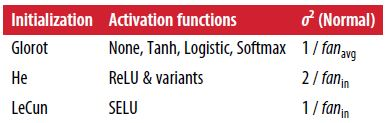

In [15]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape = [28,28], name = 'input_layer'),
                                     tf.keras.layers.Dense(300,activation='relu', kernel_initializer= 'he_normal'),
                                     tf.keras.layers.Dense(200, activation = 'relu', kernel_initializer= 'he_normal'),
                                     tf.keras.layers.Dense(100, activation = 'relu', kernel_initializer= 'he_normal'),
                                     tf.keras.layers.Dense(10, activation='softmax')])

In [16]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZER, metrics=METRICS)

EPOCHS = 10
VALIDATION_SET = (X_valid, y_valid)

history = model.fit(X_train, y_train, epochs=EPOCHS, validation_data=VALIDATION_SET,batch_size = 32)

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5210 - accuracy: 0.8595 - val_loss: 0.2459 - val_accuracy: 0.9314
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2320 - accuracy: 0.9333 - val_loss: 0.1861 - val_accuracy: 0.9478
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1812 - accuracy: 0.9477 - val_loss: 0.1518 - val_accuracy: 0.9584
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1498 - accuracy: 0.9564 - val_loss: 0.1366 - val_accuracy: 0.9626
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1264 - accuracy: 0.9632 - val_loss: 0.1375 - val_accuracy: 0.9604
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1094 - accuracy: 0.9679 - val_loss: 0.1098 - val_accuracy: 0.9680
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0957 - accuracy: 0.9721 - val_loss: 0.0948 - val_accuracy:

In [17]:
model2 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape = [28,28], name = 'input_layer'),
                                     tf.keras.layers.Dense(300,activation='elu', kernel_initializer= 'he_normal'),
                                     tf.keras.layers.Dense(200, activation = 'elu', kernel_initializer= 'he_normal'),
                                     tf.keras.layers.Dense(100, activation = 'elu', kernel_initializer= 'he_normal'),
                                     tf.keras.layers.Dense(10, activation='softmax')])

LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model2.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZER, metrics=METRICS)

EPOCHS = 10
VALIDATION_SET = (X_valid, y_valid)

history = model2.fit(X_train, y_train, epochs=EPOCHS, validation_data=VALIDATION_SET,batch_size = 32)

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4332 - accuracy: 0.8753 - val_loss: 0.2632 - val_accuracy: 0.9266
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2586 - accuracy: 0.9243 - val_loss: 0.2125 - val_accuracy: 0.9404
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2094 - accuracy: 0.9391 - val_loss: 0.1823 - val_accuracy: 0.9506
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1760 - accuracy: 0.9489 - val_loss: 0.1620 - val_accuracy: 0.9542
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1528 - accuracy: 0.9557 - val_loss: 0.1419 - val_accuracy: 0.9614
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1351 - accuracy: 0.9612 - val_loss: 0.1278 - val_accuracy: 0.9644
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1207 - accuracy: 0.9649 - val_loss: 0.1229 - val_accuracy:

In [18]:
print("For he normal is {}".format(model.evaluate(X_test, y_test)))
print("For he normal with elu AF is {}".format(model2.evaluate(X_test, y_test)))

313/313 [==============================] - 1s 3ms/step - loss: 13.7755 - accuracy: 0.9700
For he normal is [13.775456428527832, 0.9700000286102295]
313/313 [==============================] - 1s 3ms/step - loss: 28.1322 - accuracy: 0.8776
For he normal with elu AF is [28.132186889648438, 0.8776000142097473]


In [21]:
#Implementation of relu activation function

model = tf.keras.models.Sequential([tf.keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]), tf.keras.layers.Dense(1)])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

Epoch 1/20
1719/1719 [==============================] - 3s 2ms/step - loss: 8.2012 - val_loss: 7.9216
Epoch 2/20
1719/1719 [==============================] - 3s 2ms/step - loss: 7.9992 - val_loss: 7.8602
Epoch 3/20
1719/1719 [==============================] - 3s 2ms/step - loss: 7.9586 - val_loss: 7.8496
Epoch 4/20
1719/1719 [==============================] - 3s 2ms/step - loss: 7.9370 - val_loss: 7.8531
Epoch 5/20
1719/1719 [==============================] - 3s 2ms/step - loss: 7.9197 - val_loss: 7.8127
Epoch 6/20
1719/1719 [==============================] - 3s 2ms/step - loss: 7.9054 - val_loss: 7.8145
Epoch 7/20
1719/1719 [==============================] - 3s 2ms/step - loss: 7.8925 - val_loss: 7.7978
Epoch 8/20
1719/1719 [==============================] - 3s 2ms/step - loss: 7.8850 - val_loss: 7.7537
Epoch 9/20
1719/1719 [==============================] - 3s 2ms/step - loss: 7.8734 - val_loss: 7.8060
Epoch 10/20
1719/1719 [==============================] - 3s 2ms/step - loss: 7.869

In a similar was as shown above, diifferent activation functions can be introduced in the model. See the below code for instance:

In [22]:
leaky_relu = tf.keras.layers.LeakyReLU(alpha=0.2)
layer = tf.keras.layers.Dense(10, activation=leaky_relu, kernel_initializer="he_normal")

In [23]:
#implementation of elu and softmax
model = tf.keras.models.Sequential([
tf.keras.layers.Flatten(input_shape=[28, 28]),
tf.keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
tf.keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
tf.keras.layers.Dense(10, activation="softmax")
])

#Observe and document results before and after applying Batch Normalisation.

Although using He initialization along with ELU (or any variant of ReLU) can significantly reduce the vanishing/exploding gradients problems at the beginning of training, it doesn’t guarantee that they won’t come back during training.

Batch Normalization (BN) was introduced to address the vanishing/exploding gradients problems. The technique consists of adding an operation in the model just before or after the activation function of each hidden layer, simply zero-centering and normalizing each input, then scaling and shifting the result using two new parameter vectors per layer: one for scaling, the other for shifting.

In order to zero-center and normalize the inputs, the algorithm needs to estimate each input’s mean and standard deviation. It does so by evaluating the mean and standard deviation of each input over the current mini-batch (hence the name “Batch Normalization”).

Equations of BN:

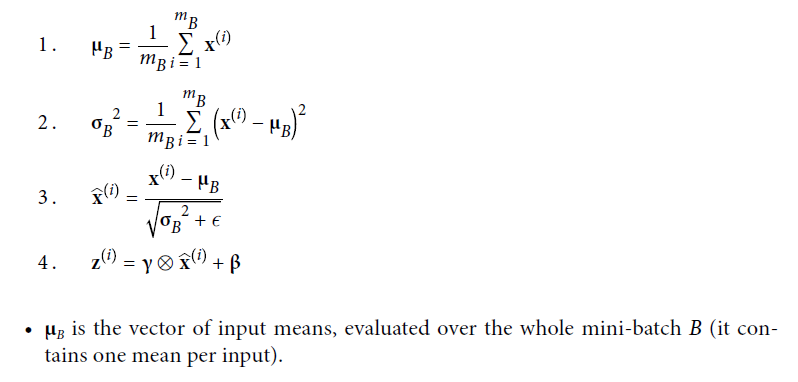
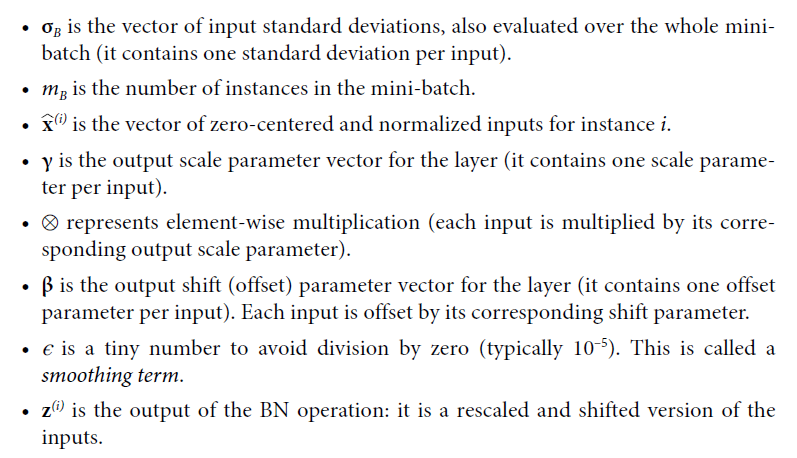

Two types of approach -
* Batch Normalization layer before the activation function.
* Batch Normalization layer after the activation function.

In [24]:
#Batch Normalization layer before the activation function
model_before = tf.keras.models.Sequential([
 tf.keras.layers.Flatten(input_shape=[28, 28]),
 tf.keras.layers.BatchNormalization(),
 tf.keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal", use_bias=False),
 tf.keras.layers.BatchNormalization(),
 tf.keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal", use_bias=False),
 tf.keras.layers.BatchNormalization(),
 tf.keras.layers.Dense(10, activation="softmax")
])


In [25]:
model_before.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_22 (Dense)             (None, 300)               235200    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_23 (Dense)             (None, 100)               30000     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_24 (Dense)             (None, 10)               

If you display the model summary, you can see that each BN layer adds 4 parameters per input: γ, β, μ and σ (for example, the first BN layer adds 3136 parameters, which is 4 times 784). 

The last two parameters, μ and σ, are the moving averages, they are not affected by backpropagation, so Keras calls them “Nontrainable” (if you count the total number of BN parameters, 3136 + 1200 + 400, and divide by two, you get 2,368, which is the total number of non-trainable params in this model).

**OBSERVATION:**To add the BN layers before the activation functions, we must remove the activation function from the hidden layers, and add them as separate layers after the BN layers.

Moreover, since a Batch Normalization layer includes one offset parameter per input, i have removed the bias term from the previous layer (use_bias=False)


In [26]:
#Batch Normalization layer after the activation function¶

model_after = tf.keras.models.Sequential([
 tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(100, use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = tf.keras.optimizers.SGD(learning_rate=1e-3)
METRICS = ["accuracy"]

model_after.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZER, metrics=METRICS)

EPOCHS = 10
VALIDATION_SET = (X_valid, y_valid)

result = model_after.fit(X_train, y_train, epochs=EPOCHS, validation_data=VALIDATION_SET,batch_size = 32)

Epoch 1/10
1719/1719 [==============================] - 10s 6ms/step - loss: 1.1572 - accuracy: 0.6702 - val_loss: 0.6364 - val_accuracy: 0.8438
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5889 - accuracy: 0.8549 - val_loss: 0.4469 - val_accuracy: 0.8854
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4648 - accuracy: 0.8820 - val_loss: 0.3672 - val_accuracy: 0.9072
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4017 - accuracy: 0.8962 - val_loss: 0.3208 - val_accuracy: 0.9156
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3597 - accuracy: 0.9045 - val_loss: 0.2905 - val_accuracy: 0.9206
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3317 - accuracy: 0.9103 - val_loss: 0.2689 - val_accuracy: 0.9244
Epoch 7/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3076 - accuracy: 0.9163 - val_loss: 0.2506 - val_accurac

In [29]:
model_after.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 50.4891 - accuracy: 0.8315


[50.4891357421875, 0.8314999938011169]

In [31]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = tf.keras.optimizers.SGD(learning_rate=1e-3)
METRICS = ["accuracy"]

model_before.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZER, metrics=METRICS)

EPOCHS = 10
VALIDATION_SET = (X_valid, y_valid)

result1 = model_before.fit(X_train, y_train, epochs=EPOCHS, validation_data=VALIDATION_SET,batch_size = 32)

Epoch 1/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.8484 - accuracy: 0.7354 - val_loss: 0.4899 - val_accuracy: 0.8602
Epoch 2/10
1719/1719 [==============================] - 9s 6ms/step - loss: 0.4706 - accuracy: 0.8628 - val_loss: 0.3831 - val_accuracy: 0.8938
Epoch 3/10
1719/1719 [==============================] - 9s 6ms/step - loss: 0.4007 - accuracy: 0.8817 - val_loss: 0.3343 - val_accuracy: 0.9058
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3626 - accuracy: 0.8932 - val_loss: 0.3085 - val_accuracy: 0.9110
Epoch 5/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3390 - accuracy: 0.8999 - val_loss: 0.2868 - val_accuracy: 0.9172
Epoch 6/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3191 - accuracy: 0.9067 - val_loss: 0.2721 - val_accuracy: 0.9204
Epoch 7/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3019 - accuracy: 0.9118 - val_loss: 0.2597 - val_accu

In [32]:
model_before.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 50.4498 - accuracy: 0.7675


[50.4498176574707, 0.7674999833106995]

In [33]:
model_after.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 50.4891 - accuracy: 0.8315


[50.4891357421875, 0.8314999938011169]

So, we can conclude that Batch Normalization layer after the activation function has some advantage over other approach.

BN layer does not perform the same computation during training and after training: it uses batch statistics during training, and the “final” statistics after training (i.e., the final value of the moving averages)

Another important hyperparameter is axis: it determines which axis should be normalized. It defaults to –1, meaning that by default it will normalize the last axis (using the means and standard deviations computed across the other axes).

For example, the first BN layer in the previous code example will independently normalize (and rescale and shift) each of the 784 input features. However, if we move the first BN layer before the Flatten layer, then the input batches will be 3D, with shape [batch size, height, width], therefore the BN layer will compute 28 means and 28 standard deviations (one per column of pixels, computed across all instances in the batch, and all rows in the column), and it will normalize all pixels in a given column using the same mean and standard deviation.

